In [1]:
import pandas as pd

df = pd.read_csv(r"../datasets/air_quality_health_impact_data-4.csv")
df.head()


,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


In [2]:
df.dtypes


RecordID                 int64
AQI                    float64
PM10                   float64
PM2_5                  float64
NO2                    float64
SO2                    float64
O3                     float64
Temperature            float64
Humidity               float64
WindSpeed              float64
RespiratoryCases         int64
CardiovascularCases      int64
HospitalAdmissions       int64
HealthImpactScore      float64
HealthImpactClass      float64
dtype: object

In [3]:
df.describe()


,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
count,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000
mean,2906.000000,248.438476,148.654997,100.223714,102.293445,49.456838,149.312431,14.975500,54.776853,9.989177,9.974187,4.988986,2.001033,93.785223,0.281191
std,1677.635538,144.777638,85.698500,58.096612,57.713175,28.530329,86.534240,14.483067,26.020786,5.776950,3.129234,2.216791,1.398794,13.318904,0.714075
min,1.000000,0.005817,0.015848,0.031549,0.009625,0.011023,0.001661,-9.990998,10.001506,0.002094,1.000000,0.000000,0.000000,22.448488,0.000000
25%,1453.500000,122.951293,75.374954,49.435171,53.538538,24.887264,73.999665,2.481500,31.995262,4.952343,8.000000,3.000000,1.000000,98.203057,0.000000
50%,2906.000000,249.127841,147.634997,100.506337,102.987736,49.530165,149.559871,14.942428,54.543904,10.051742,10.000000,5.000000,2.000000,100.000000,0.000000
75%,4358.500000,373.630668,222.436759,151.340260,151.658516,73.346617,223.380126,27.465374,77.641639,14.971840,12.000000,6.000000,3.000000,100.000000,0.000000
max,5811.000000,499.858837,299.901962,199.984965,199.980195,99.969561,299.936812,39.963434,99.997493,19.999139,23.000000,14.000000,12.000000,100.000000,4.000000


In [4]:
df.isnull().sum()


RecordID               0
AQI                    0
PM10                   0
PM2_5                  0
NO2                    0
SO2                    0
O3                     0
Temperature            0
Humidity               0
WindSpeed              0
RespiratoryCases       0
CardiovascularCases    0
HospitalAdmissions     0
HealthImpactScore      0
HealthImpactClass      0
dtype: int64

In [5]:
X = df.drop(columns=["RecordID", "HealthImpactClass"])
y = df["HealthImpactClass"]


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


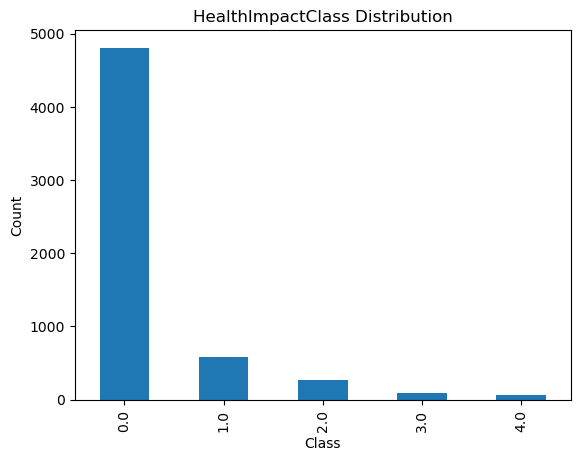

HealthImpactClass
0.0    4808
1.0     579
2.0     273
3.0      95
4.0      56
Name: count, dtype: int64

In [7]:
import matplotlib.pyplot as plt

y.value_counts().plot(kind="bar", title="HealthImpactClass Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

y.value_counts()


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [9]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

pd.Series(y_train_sm).value_counts()


HealthImpactClass
0.0    3846
1.0    3846
4.0    3846
3.0    3846
2.0    3846
Name: count, dtype: int64

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_sm, y_train_sm)
    preds = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print(classification_report(y_test, preds))



Logistic Regression
Accuracy: 0.5408426483233018
              precision    recall  f1-score   support

         0.0       0.96      0.53      0.68       962
         1.0       0.48      0.70      0.57       116
         2.0       0.58      0.69      0.63        55
         3.0       0.01      0.05      0.02        19
         4.0       0.00      0.09      0.01        11

    accuracy                           0.54      1163
   macro avg       0.41      0.41      0.38      1163
weighted avg       0.87      0.54      0.65      1163


Random Forest
Accuracy: 0.9535683576956148
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       962
         1.0       0.97      0.89      0.93       116
         2.0       0.92      0.80      0.85        55
         3.0       0.83      0.53      0.65        19
         4.0       0.00      0.00      0.00        11

    accuracy                           0.95      1163
   macro avg       0.74      0.64    

In [11]:
from sklearn.model_selection import GridSearchCV

lr_grid = {"C": [0.1, 1, 10]}
lr_gs = GridSearchCV(LogisticRegression(max_iter=1000), lr_grid, cv=3)
lr_gs.fit(X_train_sm, y_train_sm)


,estimator,LogisticRegre...max_iter=1000)
,param_grid,"{'C': [0.1, 1, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [12]:
rf_grid = {"max_depth": [None, 10]}
rf_gs = GridSearchCV(
    RandomForestClassifier(n_estimators=100, random_state=42),
    rf_grid, cv=3
)
rf_gs.fit(X_train_sm, y_train_sm)


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 10]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [ ]:
gb_grid = {"learning_rate": [0.05, 0.1]}
gb_gs = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    gb_grid, cv=3
)
gb_gs.fit(X_train_sm, y_train_sm)


In [ ]:
best_models = {
    "Tuned Logistic Regression": lr_gs.best_estimator_,
    "Tuned Random Forest": rf_gs.best_estimator_,
    "Tuned Gradient Boosting": gb_gs.best_estimator_
}

for name, model in best_models.items():
    preds = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print(classification_report(y_test, preds))


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

for name, model in best_models.items():
    preds = model.predict(X_test)
    cm = confusion_matrix(y_test, preds)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(name)
    plt.show()
